In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
data_loc = '../../dataset/'
dectlist = ['card_deck1','card_deck2','card_deck3','card_deck4','card_deck5']

In [4]:
cardlist=[]
for i in os.listdir(data_loc+'card_deck1'):
    cardlist.append(i[:-4])

In [5]:
imglist = []
for j in cardlist:
    for i in dectlist:
        imglist.append(cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE) )

In [6]:
labellist=[]
for i in cardlist:
    for j in range(5):
        labellist.append(i)

In [7]:
print(len(imglist))
print(imglist[0].shape)
print(len(labellist))
print(labellist[0])

260
(120, 100)
260
C10


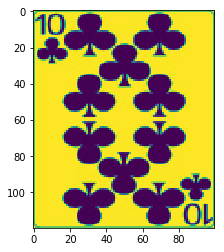

In [8]:
plt.imshow(imglist[0])

In [9]:
imglist[0].shape

(120, 100)

In [10]:
cell_size = (120, 100)
block_size = (1, 1)
nbins = 9
hog = cv2.HOGDescriptor(_winSize = (imglist[0].shape[1]// cell_size[1] * cell_size[1],
                                   imglist[0].shape[0] // cell_size[0] * cell_size[0]),
                       _blockSize = (block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                       _blockStride = (cell_size[1], cell_size[0]),
                       _cellSize = (cell_size[1], cell_size[0]),
                       _nbins = nbins)

In [11]:
computed = []
for img in imglist:
    computed.append(hog.compute(img))
print(computed[0])

[[0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]
 [0.3327787]]


In [12]:
train_desc = np.array(computed).squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(52), len(train_desc)/52)
print(train_desc.shape, train_labels.shape)

(260, 9) (260,)


In [13]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)
svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)

True

In [14]:
test_img = cv2.imread('spade10.jpg')
img_resize = cv2.resize(test_img, (120, 100), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

ret, res = svm.predict(test_desc.T)
print(int(res), cardlist[int(res)], ret)

2 C3 0.0


In [ ]:
test_img = cv2.imread('D5.jpg')
img_resize = cv2.resize(test_img, (120, 100), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

ret, res = svm.predict(test_desc.T)
print(int(res), cardlist[int(res)], ret)

In [14]:
test_img = cv2.imread('SK.jpg')
img_resize = cv2.resize(test_img, (120, 100), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

ret, res = svm.predict(test_desc.T)
print(int(res), cardlist[int(res)], ret)

51 SQ 0.0


In [15]:
np.array(cardlist)

array(['C10', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'CA', 'CJ',
       'CK', 'CQ', 'D10', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       'DA', 'DJ', 'DK', 'DQ', 'H10', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7',
       'H8', 'H9', 'HA', 'HJ', 'HK', 'HQ', 'S10', 'S2', 'S3', 'S4', 'S5',
       'S6', 'S7', 'S8', 'S9', 'SA', 'SJ', 'SK', 'SQ'], dtype='<U3')